<a href="https://colab.research.google.com/github/kjytay/misc/blob/master/blog/Comparison_of_classical_and_Nesterov_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(A, b, x):
  """
  Compute the quadratic form x^T A x / 2 + b x.
  """
  return 0.5 * np.dot(x.T, np.dot(A, x)) + np.dot(b, x)

def grad_f(A, b, x):
  """
  Compute gradient of quadratic form x^T A x / 2 + b x, i.e. Ax + b.
  """
  return np.dot(A, x) + b

In [4]:
def gradient_descent(A, b, initial_x, step_size, num_steps=10):
  """
  Gradient descent steps for quadratic form x^T A x / 2 + b x.
  Written in a slightly pedantic way to demonstrate the differences between
  vanilla GD and GD with momentum / Nesterov AGD.
  """
  x = [initial_x.copy()]
  steps = [np.array([0., 0.])]

  current_x = initial_x.copy()
  for _ in range(num_steps):
    momentum_step = np.array([0., 0.])  # no momentum
    gradient_step = -step_size * grad_f(A, b, current_x)
    current_step = momentum_step + gradient_step
    current_x += current_step
    x.append(current_x.copy())
    steps.append(current_step)

  return x

In [5]:
def momentum_gd(A, b, initial_x, step_size, momentum_coef, num_steps=10):
  """
  Gradient descent with momentum steps for quadratic form x^T A x / 2 + b x.
  """
  x = [initial_x.copy()]
  steps = [np.array([0., 0.])]

  current_x = initial_x.copy()
  for _ in range(num_steps):
    momentum_step = momentum_coef * steps[-1]
    gradient_step = -step_size * grad_f(A, b, current_x)  # gradient at current point
    current_step = momentum_step + gradient_step
    current_x += current_step
    x.append(current_x.copy())
    steps.append(current_step)

  return x

In [6]:
def nesterov_agd(A, b, initial_x, step_size, momentum_coef, num_steps=10):
  """
  Gradient descent with momentum steps for quadratic form x^T A x / 2 + b x.
  """
  x = [initial_x.copy()]
  steps = [np.array([0., 0.])]

  current_x = initial_x.copy()
  for _ in range(num_steps):
    momentum_step = momentum_coef * steps[-1]
    gradient_step = -step_size * grad_f(A, b, current_x + momentum_step)  # gradient after momentum step
    current_step = momentum_step + gradient_step
    current_x += current_step
    x.append(current_x.copy())
    steps.append(current_step)

  return x

In [140]:
def plot_paths(points_list, color_list):
  """
  Helper function for plotting points and arrows for each method.
  """
  for (idx, points) in enumerate(points_list):
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]

    # Plot points
    plt.scatter(x_coords, y_coords, color=color_list[idx], s=10)

    # Plot arrows
    for i in range(len(points) - 1):
      plt.annotate('', xy=points[i+1], xytext=points[i],
                   arrowprops=dict(arrowstyle="->", color=color_list[idx]))

def plot_final_points(points_list, color_list):
  """
  Helper function for plotting final location of each method.
  """
  for (idx, points) in enumerate(points_list):
    plt.scatter(points[-1][0], points[-1][1], s=80, facecolors='none',
                edgecolors=color_list[idx])

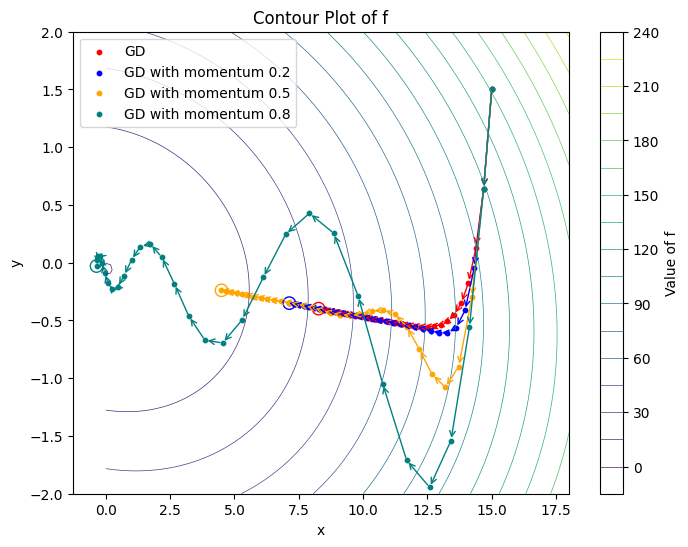

In [145]:
# Contour plot: Effect of momentum
# Define parameters
A = np.array([[1.0, 0.5], [0.8, 20.0]])
b = np.array([0., 1.])
initial_x = np.array([15.0, 1.5])
step_size = 0.02
num_steps = 30

# get iterates
points_list = [
    gradient_descent(A, b, initial_x, step_size, num_steps=num_steps),
    momentum_gd(A, b, initial_x, step_size, momentum_coef=0.2, num_steps=num_steps),
    momentum_gd(A, b, initial_x, step_size, momentum_coef=0.5, num_steps=num_steps),
    momentum_gd(A, b, initial_x, step_size, momentum_coef=0.8, num_steps=num_steps)
]
color_list = ['red', 'blue', 'orange', 'teal']

# create a grid of points
x_vals = np.linspace(0, 18, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute f for each point in the grid
Z = np.array([[f(A, b, np.array([x, y])) for x in x_vals] for y in y_vals])

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels = 20, linewidths = 0.5)  # Change levels for more or fewer contours
plot_paths(points_list, color_list)
plot_final_points(points_list, color_list)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f')
plt.colorbar(contour, label='Value of f')
plt.legend(['GD', 'GD with momentum 0.2', 'GD with momentum 0.5', 'GD with momentum 0.8'])
plt.show()

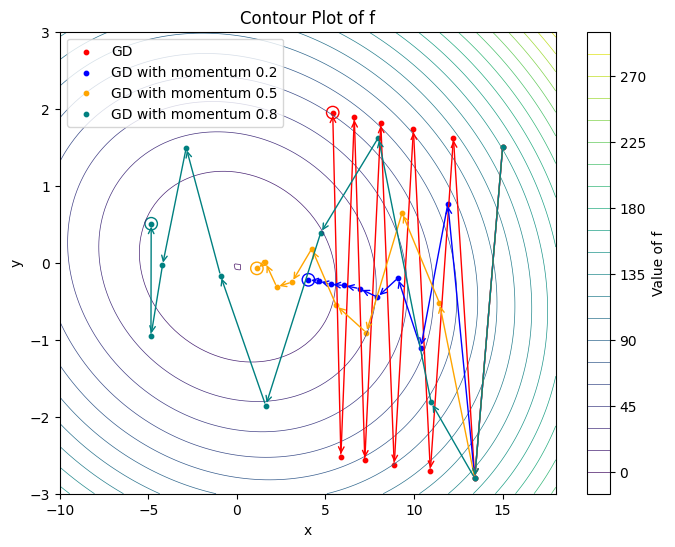

In [146]:
# Contour plot: Effect of momentum, different step size
# Define parameters
A = np.array([[1.0, 0.5], [0.8, 20.0]])
b = np.array([0., 1.])
initial_x = np.array([15.0, 1.5])
step_size = 0.1
num_steps = 10

# get iterates
points_list = [
    gradient_descent(A, b, initial_x, step_size, num_steps=num_steps),
    momentum_gd(A, b, initial_x, step_size, momentum_coef=0.2, num_steps=num_steps),
    momentum_gd(A, b, initial_x, step_size, momentum_coef=0.5, num_steps=num_steps),
    momentum_gd(A, b, initial_x, step_size, momentum_coef=0.8, num_steps=num_steps)
]
color_list = ['red', 'blue', 'orange', 'teal']

# create a grid of points
x_vals = np.linspace(-10, 18, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute f for each point in the grid
Z = np.array([[f(A, b, np.array([x, y])) for x in x_vals] for y in y_vals])

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels = 20, linewidths = 0.5)  # Change levels for more or fewer contours
plot_paths(points_list, color_list)
plot_final_points(points_list, color_list)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f')
plt.colorbar(contour, label='Value of f')
plt.legend(['GD', 'GD with momentum 0.2', 'GD with momentum 0.5', 'GD with momentum 0.8'])
plt.show()

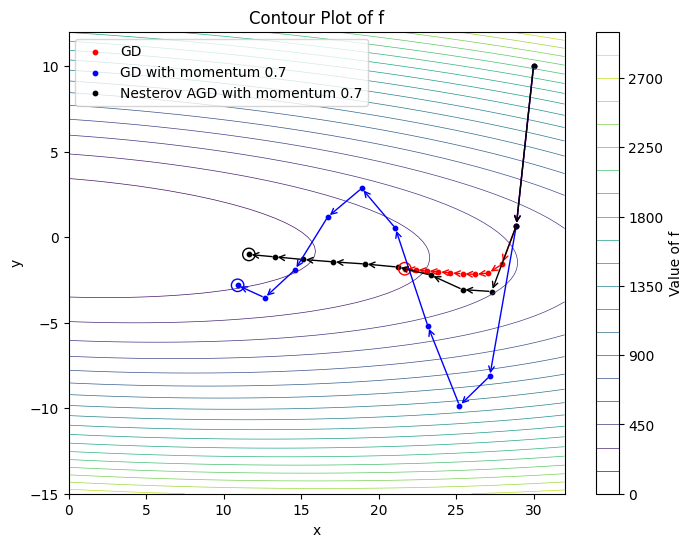

In [173]:
# Contour plot: Effect of momentum
# Define parameters
A = np.array([[1.0, 0.5], [2., 25.0]])
b = np.array([2., 1.])
initial_x = np.array([30.0, 10])
step_size = 0.03
num_steps = 10

# get iterates
points_list = [
    gradient_descent(A, b, initial_x, step_size, num_steps=num_steps),
    momentum_gd(A, b, initial_x, step_size, momentum_coef=0.7, num_steps=num_steps),
    nesterov_agd(A, b, initial_x, step_size, momentum_coef=0.7, num_steps=num_steps)
]
color_list = ['red', 'blue', 'black']

# create a grid of points
x_vals = np.linspace(0, 32, 100)
y_vals = np.linspace(-15, 12, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute f for each point in the grid
Z = np.array([[f(A, b, np.array([x, y])) for x in x_vals] for y in y_vals])

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels = 20, linewidths = 0.5)  # Change levels for more or fewer contours
plot_paths(points_list, color_list)
plot_final_points(points_list, color_list)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f')
plt.colorbar(contour, label='Value of f')
plt.legend(['GD', 'GD with momentum 0.7', 'Nesterov AGD with momentum 0.7'])
plt.show()